# **Predictive Analytics: Prediksi Biaya Asuransi Kesehatan**
- **Nama:** M Wildan Nurohman
- **Email:** wildangtg15@gmail.com
- **Dataset:** https://www.kaggle.com/datasets/mirichoi0218/insurance

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Data manipulation & analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprosessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler


## Data Understanding

### Data Loading

In [ ]:
# Load dataset
df = pd.read_csv('insurance.csv')

# Tampilkan 5 baris pertama
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Assesing and Data Cleaning

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Menunjukan 5 baris awal pada data, setiap baris mewakili 1 pasien, dan kolom kolom lainnya merepresentasikan fitur yg digunakan dalam prediksi biaya asuransi

### Data Assessing

- Memastikan bahwa dataset bersih dan tidak mengandung nilai kosong (null).

- Data yang tidak lengkap bisa menyebabkan error saat training atau bias pada model.

In [ ]:
# Cek apakah ada missing value
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Dataset ini tidak memiliki missing value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


df.info(), digunakan untuk melihat ringkasan struktur pada DataFrame, termasuk tipe data, jumlah entri non-null pada setiap kolom, serta penggunaan memori

In [ ]:
# Cek jumlah duplikat
duplicate_rows = df[df.duplicated()]
print(f"Jumlah duplikat: {duplicate_rows.shape[0]}")

# Tampilkan baris duplikat
print(duplicate_rows)

# Hapus duplikat
df = df.drop_duplicates()

# Verifikasi kembali
print(f"Jumlah data setelah menghapus duplikat: {df.shape[0]}")


Jumlah duplikat: 1
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631
Jumlah data setelah menghapus duplikat: 1337


Fungsi .duplicated() digunakan untuk mendeteksi adanya baris yang sama persis (duplikat) di dalam DataFrame, kemudian fungsi sum() menghitung totalnya. Hasil output menunjukkan ada 1 baris duplikat, dan menggunakan fungsi .drop_duplicated(), untuk menghapus data yg duplikat tersebut

In [ ]:
# Menampilkan statistik deskriptif untuk kolom numerik dalam DataFrame.
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Fungsi df.describe() digunakan untuk menampilkan statistik deskriptif dari kolom-kolom numerik, antara lain:

- Count: jumlah entri non-null per kolom (dalam hal ini, semuanya 1337).
- Mean: nilai rata-rata.
- Std: standar deviasi.
- Min: nilai minimum.
- 25%: kuartil pertama (Q1).
- 50%: nilai median atau kuartil kedua (Q2).
- 75%: kuartil ketiga (Q3).
- Max: nilai maksimum.

### Exploratory Data Analysis (EDA)

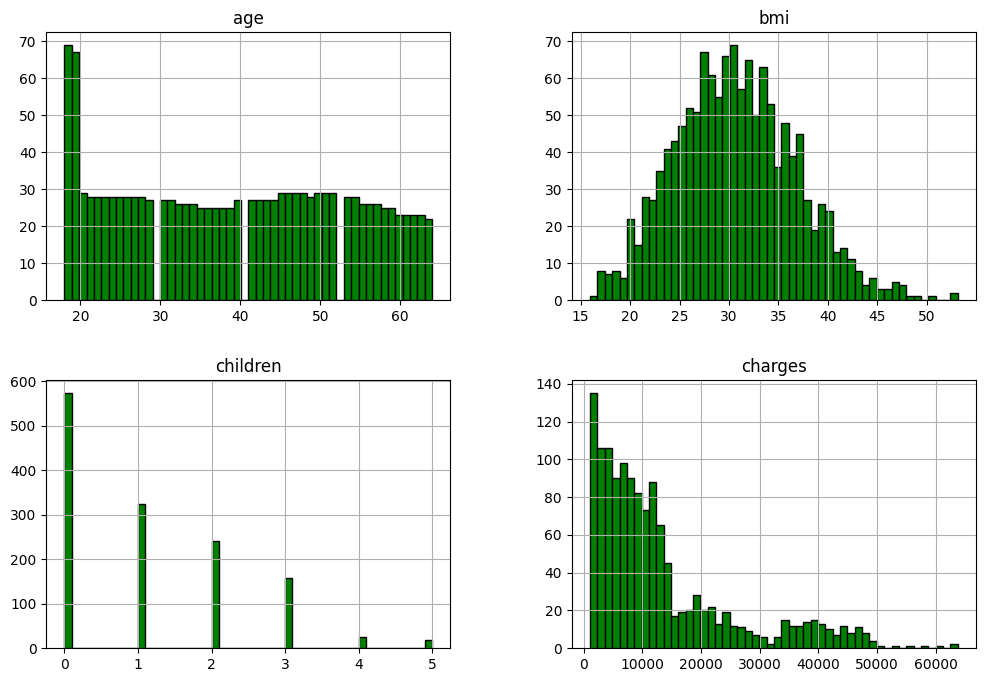

In [ ]:
# Memvisualisasikan distribusi data numerik menggunakan histogram.
df.hist(bins=50, figsize=(12, 8), color='g', edgecolor='black')
plt.show()

Age :
- Distribusi usia menunjukkan puncak yang signifikan di kisaran 18-20 tahun, diikuti oleh penurunan bertahap hingga usia 60-an. Ini menunjukkan bahwa dataset memiliki lebih banyak individu muda (18-30 tahun) dibandingkan kelompok usia yang lebih tua, dengan distribusi yang agak miring ke kiri.

BMI :
- Distribusi BMI mendekati normal, dengan puncak utama di kisaran 30-35. Ada ekor panjang ke arah nilai BMI yang lebih tinggi (>45), yang mengindikasikan adanya beberapa outlier atau individu dengan BMI ekstrem.

Children :
- Distribusi sangat miring ke kiri, dengan mayoritas individu (sekitar 500-600 orang) tidak memiliki anak (0). Jumlah individu dengan 1, 2, atau 3 anak menurun secara bertahap, dan sangat sedikit yang memiliki 4 atau 5 anak, menunjukkan bahwa fitur ini memiliki variasi terbatas.


<ipython-input-62-2c52943ad744>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='smoker', palette='pastel')


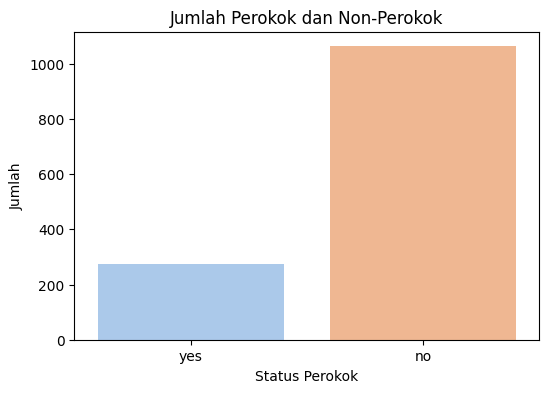

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='smoker', palette='pastel')
plt.title('Jumlah Perokok dan Non-Perokok')
plt.ylabel('Jumlah')
plt.xlabel('Status Perokok')
plt.show()


Penjelasan :
- **Perokok** 274 / 1338 ≈ 20.5%
- **Non-Perokok** 1064 / 1338 ≈ 79.5%

1. Analisis Distribusi Target, tujuannya untuk:
    - Mengetahui sebaran data target yang akan diprediksi.
    - Membantu memilih metrik evaluasi dan model yang tepat.

<Axes: xlabel='charges', ylabel='Count'>

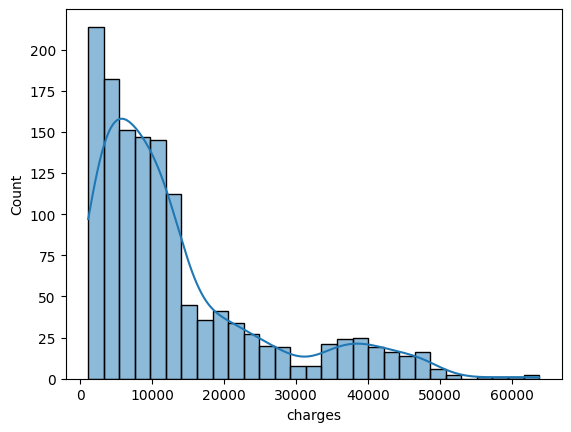

In [ ]:
# Analisis distribusi target
sns.histplot(df['charges'], kde=True)


Distribusi sangat miring ke kanan (right-skewed), dengan puncak utama di kisaran 0-10,000. Sebagian besar biaya asuransi berada di bawah $20,000, tetapi ada ekor panjang hingga $60,000, menunjukkan adanya nilai ekstrem (misalnya, biaya tinggi untuk perokok atau individu dengan kondisi kesehatan serius).  

2. Analisis Korelasi Antar Variable Numerik, tujuannya untuk :
    - Melihat hubungan linier antar fitur dan target (charges).
    - Membantu dalam feature selection dan deteksi multikolinearitas.

<Axes: >

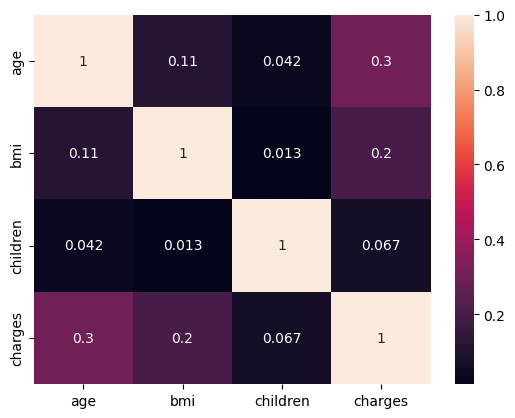

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

Variabel age, bmi, dan children memiliki korelasi positif terhadap charges, tapi age dan bmi lebih dominan. Ini artinya, makin tua dan makin tinggi BMI seseorang, makin mahal potensi biaya asuransinya.

3. Analisis Kategorikal Terhadap Charges, tujuannya untuk :
    - Melihat pengaruh kategori terhadap biaya asuransi.
    - Mengetahui variabel kategorikal mana yang paling berdampak besar.

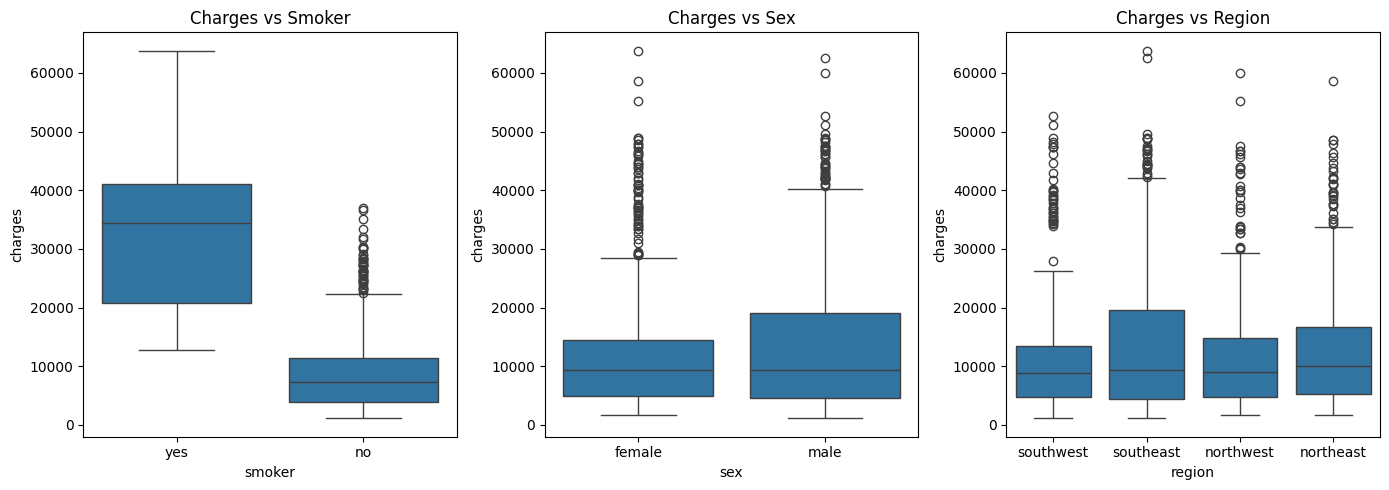

In [ ]:
plt.figure(figsize=(14, 5))

# Charges vs Smoker
plt.subplot(1, 3, 1)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges vs Smoker')

# Charges vs Sex
plt.subplot(1, 3, 2)
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges vs Sex')

# Charges vs Region
plt.subplot(1, 3, 3)
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges vs Region')

plt.tight_layout()
plt.show()


#### **Charges vs Smoker** :
- Perokok (yes) memiliki biaya asuransi yang jauh lebih tinggi dibandingkan non-perokok.

- Median charges untuk perokok berada di sekitar 35.000, sementara non-perokok hanya sekitar 8.000.

- Distribusi biaya untuk perokok juga lebih menyebar (varians besar), dengan nilai maksimum menyentuh lebih dari 60.000.

**_Insights_** :

Merokok adalah faktor risiko utama yang menyebabkan peningkatan drastis pada biaya asuransi kesehatan. Hal ini menunjukkan bahwa status merokok merupakan predictor yang sangat kuat dan penting untuk model prediksi.

#### **Charges vs Sex** :
- Median biaya antara pria dan wanita hampir sama (sekitar 10.000–12.000).
- Terdapat outlier pada kedua kelompok, tetapi distribusi nilai charges relatif seimbang.

**_Insights_** :

Jenis kelamin tidak terlalu berpengaruh signifikan terhadap biaya asuransi. Artinya, variabel sex mungkin memiliki kontribusi rendah dalam model prediksi.

#### **Charges vs Region** :
- Median biaya asuransi hampir sama di semua wilayah, meskipun southeast sedikit lebih tinggi.
- Semua wilayah memiliki banyak outlier, tapi tidak ada pola perbedaan yang sangat jelas antar region.

**_Insights_** :

Wilayah geografis hanya memiliki pengaruh kecil terhadap perbedaan biaya asuransi. Namun, wilayah southeast menunjukkan sedikit kecenderungan untuk memiliki biaya lebih tinggi, mungkin karena faktor demografis atau pola hidup.

### Data Preparation

In [ ]:
# Encoding fitur kategorikal
encoded_df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Menampilkan beberapa kolom awal
print(encoded_df.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


Penjelasan :
- drop_first=True menghindari dummy variable trap.
- Kolom sex akan jadi sex_male (0: female, 1: male)
- Kolom smoker akan jadi smoker_yes (0: false, 1: true)
- Kolom region akan jadi region_northwest, region_southeast, region_southwest (tanpa northeast karena di-drop)

#### Standarisasi

Standardisasi bertujuan untuk menyamakan skala fitur numerik dalam dataset. Ini penting karena banyak algoritma machine learning (seperti regresi linear) sangat sensitif terhadap skala fitur. Jika tidak distandarkan, fitur dengan rentang nilai besar dapat mendominasi proses pelatihan dan membuat model bias.

In [ ]:
# Fitur numerik
num_features = ['age', 'bmi', 'children']

# Inisialisasi scaler
scaler = StandardScaler()

# Simpan hasil scaling di DataFrame baru
encoded_df[num_features] = scaler.fit_transform(encoded_df[num_features])


Scaling memastikan fitur numerik seperti age, bmi, dan children berada pada skala yang sama.

In [ ]:
# Pisahkan fitur dan target
X = encoded_df.drop('charges', axis=1)
y = encoded_df['charges']

- X = encoded_df.drop('charges', axis=1) → Mengambil semua kolom kecuali kolom 'charges' sebagai fitur.
- y = encoded_df['charges'] → Mengambil kolom 'charges' sebagai target (label).

#### Split Dataset

Pada tahap ini, dataset dibagi menjadi dua bagian, yaitu data latih (training set) dan data uji (testing set). Tujuannya untuk :

- Model dilatih hanya pada data training.
- Data testing digunakan untuk mengukur kemampuan generalisasi model terhadap data baru yang tidak pernah dilihat sebelumnya.

In [ ]:
# Split Dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Membagi 80% untuk data train dan 20% untuk data test

## Modelling

Bagian ini bertujuan untuk membangun model machine learning menggunakan algoritma yang sesuai dan meningkatkan kinerjanya melalui proses tuning. Model dikembangkan, dievaluasi, dan disempurnakan dengan memilih kombinasi parameter terbaik menggunakan teknik seperti Grid Search.

##### 1. Linear Regression

Linear Regression digunakan sebagai baseline karena model ini mudah diinterpretasikan dan efisien untuk data numerik dengan hubungan linear.


In [ ]:
# 1. Inisialisasi model
lr_model = LinearRegression()

# 2. Latih model dengan data training
lr_model.fit(X_train, y_train)

# 3. Prediksi dengan data test
y_pred = lr_model.predict(X_test)

# 4. Evaluasi performa model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== Linear Regression Performance ===")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

=== Linear Regression Performance ===
MAE  : 4177.05
RMSE : 5956.34
R²   : 0.8069


Model ini menunjukkan hasil yang cukup baik di hubungan antar fitur bersifat linier. Namun, performanya bisa menurun bila ada non-linearitas atau interaksi kompleks antar fitur (pengaruh besar dari perokok terhadap biaya asuransi).

##### 2. Random Forest

Random Forest lebih mampu menangani non-linearitas dan interaksi antar fitur tanpa perlu transformasi yang kompleks.

In [ ]:
# 1. Inisialisasi Model
rf_model = RandomForestRegressor(
    n_estimators=100,      # Jumlah pohon
    random_state=42,       # Untuk reproducibility
    n_jobs=-1             # Gunakan semua core CPU
)

# 2. Latih model dengan data training
rf_model.fit(X_train, y_train)

# 3. Prediksi dengan data test
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluasi performa model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("=== Random Forest Regression Performance ===")
print(f"MAE  : {mae_rf:.2f}")
print(f"RMSE : {rmse_rf:.2f}")
print(f"R²   : {r2_rf:.4f}")



=== Random Forest Regression Performance ===
MAE  : 2637.99
RMSE : 4702.45
R²   : 0.8797


Model ini menghasilkan performa yang lebih baik dibandingkan Linear Regression karena fleksibilitasnya dalam menangani data yang kompleks. Bisa menangkap pengaruh besar dari status perokok tanpa perlu eksplisit membuat fitur interaksi.

Melakukan Hyperparameter Tuning, untuk :
 - meningkatkan performa model
 - mencegah underfitting atau overfitting
 - optimasi waktu training
 - mendapatkan generalisasi yg baik

In [ ]:
# 5. Hyperparameter Tuning
print("\n=== Hyperparameter Tuning ===")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search dengan Cross Validation
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

# Best model dari grid search
best_rf_model = rf_grid.best_estimator_
print(f"Best parameters: {rf_grid.best_params_}")
print(f"Best CV R² score: {rf_grid.best_score_:.4f}")


=== Hyperparameter Tuning ===
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best CV R² score: 0.8363


Penjelasan :

- param_grid: kombinasi hyperparameter yang akan diuji.
- n_estimators: jumlah pohon dalam Random Forest.
- max_depth: kedalaman maksimum pohon. None artinya tak terbatas.
- min_samples_split: minimal jumlah sampel untuk membagi node.
- min_samples_leaf: minimal jumlah sampel di leaf node.

Total kombinasi 3 x 3 x 3 x 3 = 81 Kombinasi


- GridSearchCV: digunakan untuk menemukan kombinasi parameter terbaik.
- cv=5: menggunakan 5-fold cross-validation.
- scoring='r2': evaluasi berdasarkan R² Score.
- n_jobs=-1: gunakan seluruh core CPU untuk paralelisasi.
- verbose=1: mencetak progress pencarian grid.



Penjelasan Output :
- 100 pohon (n_estimators=100)
- Maksimal kedalaman 10 (max_depth=10)
- Setiap node harus punya setidaknya 10 data untuk dibagi (min_samples_split=10)
- Daun (leaf) minimal berisi 4 data (min_samples_leaf=4)

Dan model ini menghasilkan performa R² sebesar 0.8363 pada data validasi silang.

## Evaluasi dan Visualisasi


=== Best Random Forest Performance ===
MAE  : 2461.34
RMSE : 4362.76
R²   : 0.8964


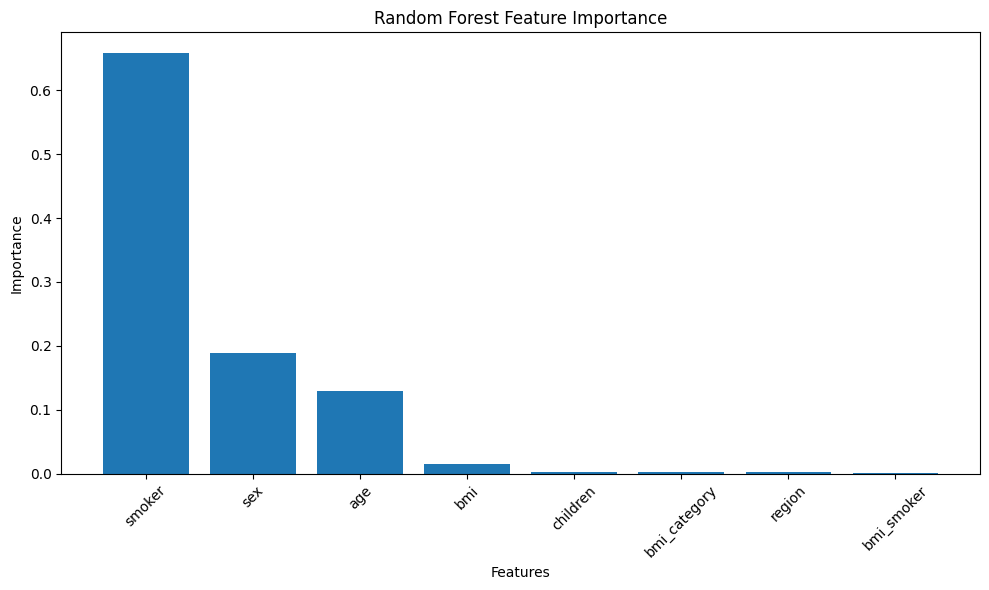

In [ ]:
# 6. Evaluasi best model
y_pred_best = best_rf_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("\n=== Best Random Forest Performance ===")
print(f"MAE  : {mae_best:.2f}")
print(f"RMSE : {rmse_best:.2f}")
print(f"R²   : {r2_best:.4f}")

# 7. Feature Importance
feature_importance = best_rf_model.feature_importances_
feature_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region',
                'bmi_category', 'bmi_smoker', 'age_smoker']

# Plotting feature importance
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importance)[::-1]
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in sorted_idx], rotation=45)
plt.tight_layout()
plt.show()

Penjelasan :
- Menunjukan bahwa fitur yang paling berpengaruh adalah smoker (perokok) dengan lebih dari 60%
- Fitur sex penting (sekitar 19%)
- Fitur age juga cukup berpengaruh
- Fitur BMI sedikit berpengaruh (kurang dari 10%)
- Fitur lainnya seperti children, bmi_category, region, bmi_smoker memiliki pengaruh yg sangat kecil


=== Cross Validation Results ===
CV R² scores: [0.80748435 0.85075737 0.82783135 0.84812376 0.84708049]
Mean CV R²: 0.8363 (+/- 0.0331)


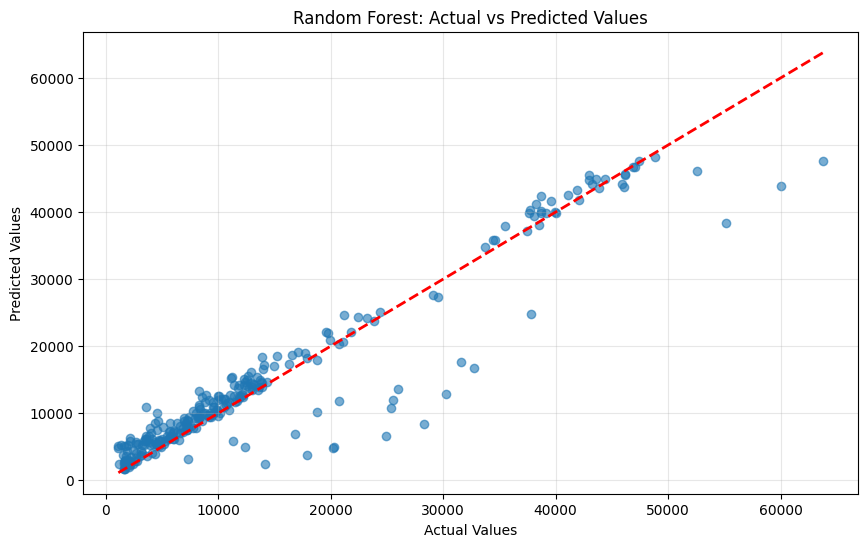

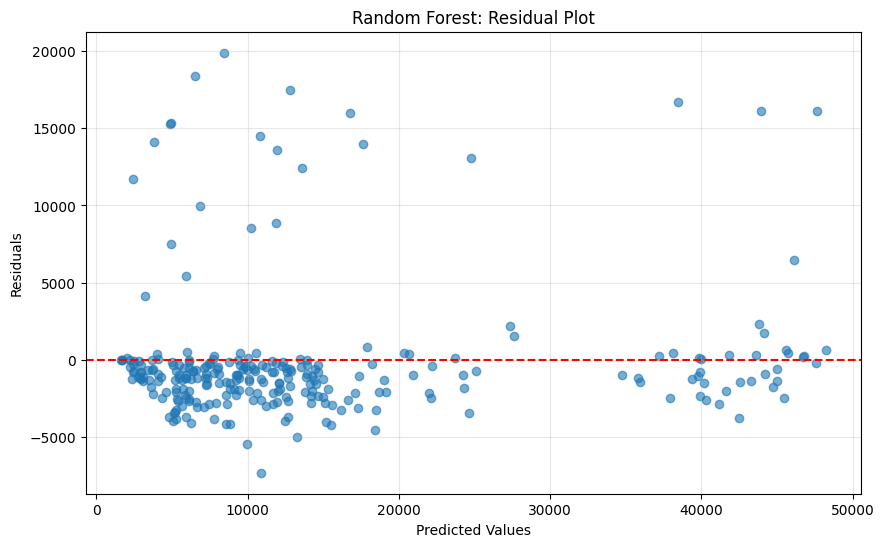

In [ ]:

# Cross Validation untuk validasi tambahan
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='r2')
print(f"\n=== Cross Validation Results ===")
print(f"CV R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted Values')
plt.grid(True, alpha=0.3)
plt.show()

#  Residual plot
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Random Forest: Residual Plot')
plt.grid(True, alpha=0.3)
plt.show()

Penjelasan :

**Sumbu X** : Menampilkan nilai prediksi (Predicted Values) dari model Random Forest terhadap biaya asuransi.
**Sumbu Y** : Menampilkan residual (selisih antara nilai aktual dan nilai prediksi)

**Garis merah putus putus :** Merupakan garis referensi residu nol. Titik-titik yang dekat dengan garis ini menandakan prediksi yang sangat akurat.

**_insights_** :
- Banyak titik residu berada dekat dengan garis nol, menunjukkan bahwa model memprediksi dengan akurat untuk sebagian besar data.
- Tidak terlihat pola sistematik pada distribusi residu, ini berarti model tidak menunjukan bias serius (overfitting atau underfitting)


In [ ]:
# Comparison dengan Linear Regression
print("\n=== Model Comparison ===")
print("Linear Regression:")
print(f"  MAE: 4177.05, RMSE: 5956.34, R²: 0.8069")
print(f"Random Forest:")
print(f"  MAE: {mae_best:.2f}, RMSE: {rmse_best:.2f}, R²: {r2_best:.4f}")

improvement_r2 = ((r2_best - 0.8069) / 0.8069) * 100
print(f"R² Improvement: {improvement_r2:.2f}%")


=== Model Comparison ===
Linear Regression:
  MAE: 4177.05, RMSE: 5956.34, R²: 0.8069
Random Forest:
  MAE: 2461.34, RMSE: 4362.76, R²: 0.8964
R² Improvement: 11.09%


## **KESIMPULAN :**

- Dua model yang digunakan dalam proyek ini adalah Linear Regression dan Random Forest Regressor.

- Hasil evaluasi menunjukkan bahwa Random Forest memiliki performa yang lebih baik dengan:
  - R² = 0.8964, lebih tinggi dibanding Linear Regression (R² = 0.8069).
  - MAE dan RMSE yang lebih rendah, menunjukkan prediksi yang lebih akurat dan stabil.

| Fitur      | Importance                      |
| ---------- | ------------------------------- |
| **Smoker** | Sangat dominan (lebih dari 60%) |
| **Sex**    | Penting (sekitar 19%)           |
| **Age**    | Cukup berpengaruh               |
| **BMI**    | Sedikit berpengaruh             |
| Lainnya    | Pengaruh sangat kecil           |

- Faktor perokok (smoker) adalah penentu utama biaya asuransi, disusul oleh jenis kelamin dan usia.
- Ini sejalan dengan logika bisnis, karena merokok berkorelasi dengan risiko kesehatan yang tinggi.
- Ini membantu merancang struktur premi yang lebih proporsional terhadap risiko, sekaligus meningkatkan efisiensi dan transparansi dalam penilaian calon nasabah.